In [1]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# Models for Scikit-learn 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model for XGB
#from xgboost import xgb, XGBClassifier 

# Model Evaluation 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("data/jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [4]:
df.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


In [5]:
df.nunique()

JAMB_Score                       220
Study_Hours_Per_Week              41
Attendance_Rate                   51
Teacher_Quality                    5
Distance_To_School               201
School_Type                        2
School_Location                    2
Extra_Tutorials                    2
Access_To_Learning_Materials       2
Parent_Involvement                 3
IT_Knowledge                       3
Student_ID                      5000
Age                                8
Gender                             2
Socioeconomic_Status               3
Parent_Education_Level             3
Assignments_Completed              5
dtype: int64

In [6]:
df.shape

(5000, 17)

In [7]:
df.isna().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [8]:
df.Gender.value_counts()

Gender
Female    2530
Male      2470
Name: count, dtype: int64

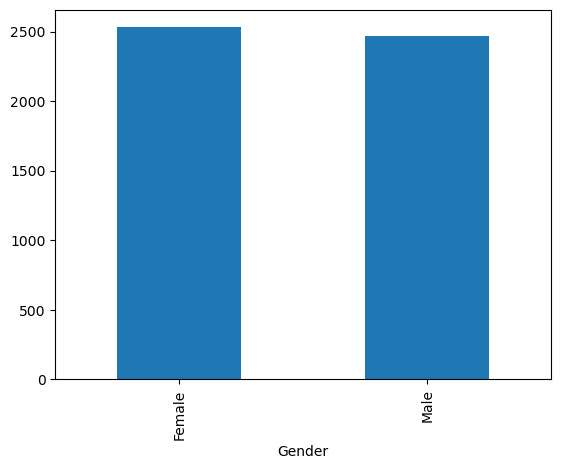

In [9]:
df.Gender.value_counts().plot.bar();

In [10]:
df.nunique()

JAMB_Score                       220
Study_Hours_Per_Week              41
Attendance_Rate                   51
Teacher_Quality                    5
Distance_To_School               201
School_Type                        2
School_Location                    2
Extra_Tutorials                    2
Access_To_Learning_Materials       2
Parent_Involvement                 3
IT_Knowledge                       3
Student_ID                      5000
Age                                8
Gender                             2
Socioeconomic_Status               3
Parent_Education_Level             3
Assignments_Completed              5
dtype: int64

In [11]:
# List of categorical columns
categorical_columns = ['Teacher_Quality', 'School_Type', 'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
                       'Parent_Involvement', 'IT_Knowledge', 'Gender', 'Socioeconomic_Status', 'Parent_Education_Level',
                      'Assignments_Completed']

# Create a function to display counts and percentages
def display_categorical_distribution(df, columns):
    for col in columns:
        print(f"Distribution for {col}:")
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        distribution = pd.DataFrame({'Count': counts, 'Percentage': percentages})
        print(distribution)
        print()  # New line for better readability

# Display the distribution for all categorical columns
display_categorical_distribution(df, categorical_columns)

Distribution for Teacher_Quality:
                 Count  Percentage
Teacher_Quality                   
2                 1757       35.14
3                 1669       33.38
1                  775       15.50
4                  684       13.68
5                  115        2.30

Distribution for School_Type:
             Count  Percentage
School_Type                   
Public        3735        74.7
Private       1265        25.3

Distribution for School_Location:
                 Count  Percentage
School_Location                   
Urban             2834       56.68
Rural             2166       43.32

Distribution for Extra_Tutorials:
                 Count  Percentage
Extra_Tutorials                   
Yes               2721       54.42
No                2279       45.58

Distribution for Access_To_Learning_Materials:
                              Count  Percentage
Access_To_Learning_Materials                   
Yes                            3346       66.92
No                      

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

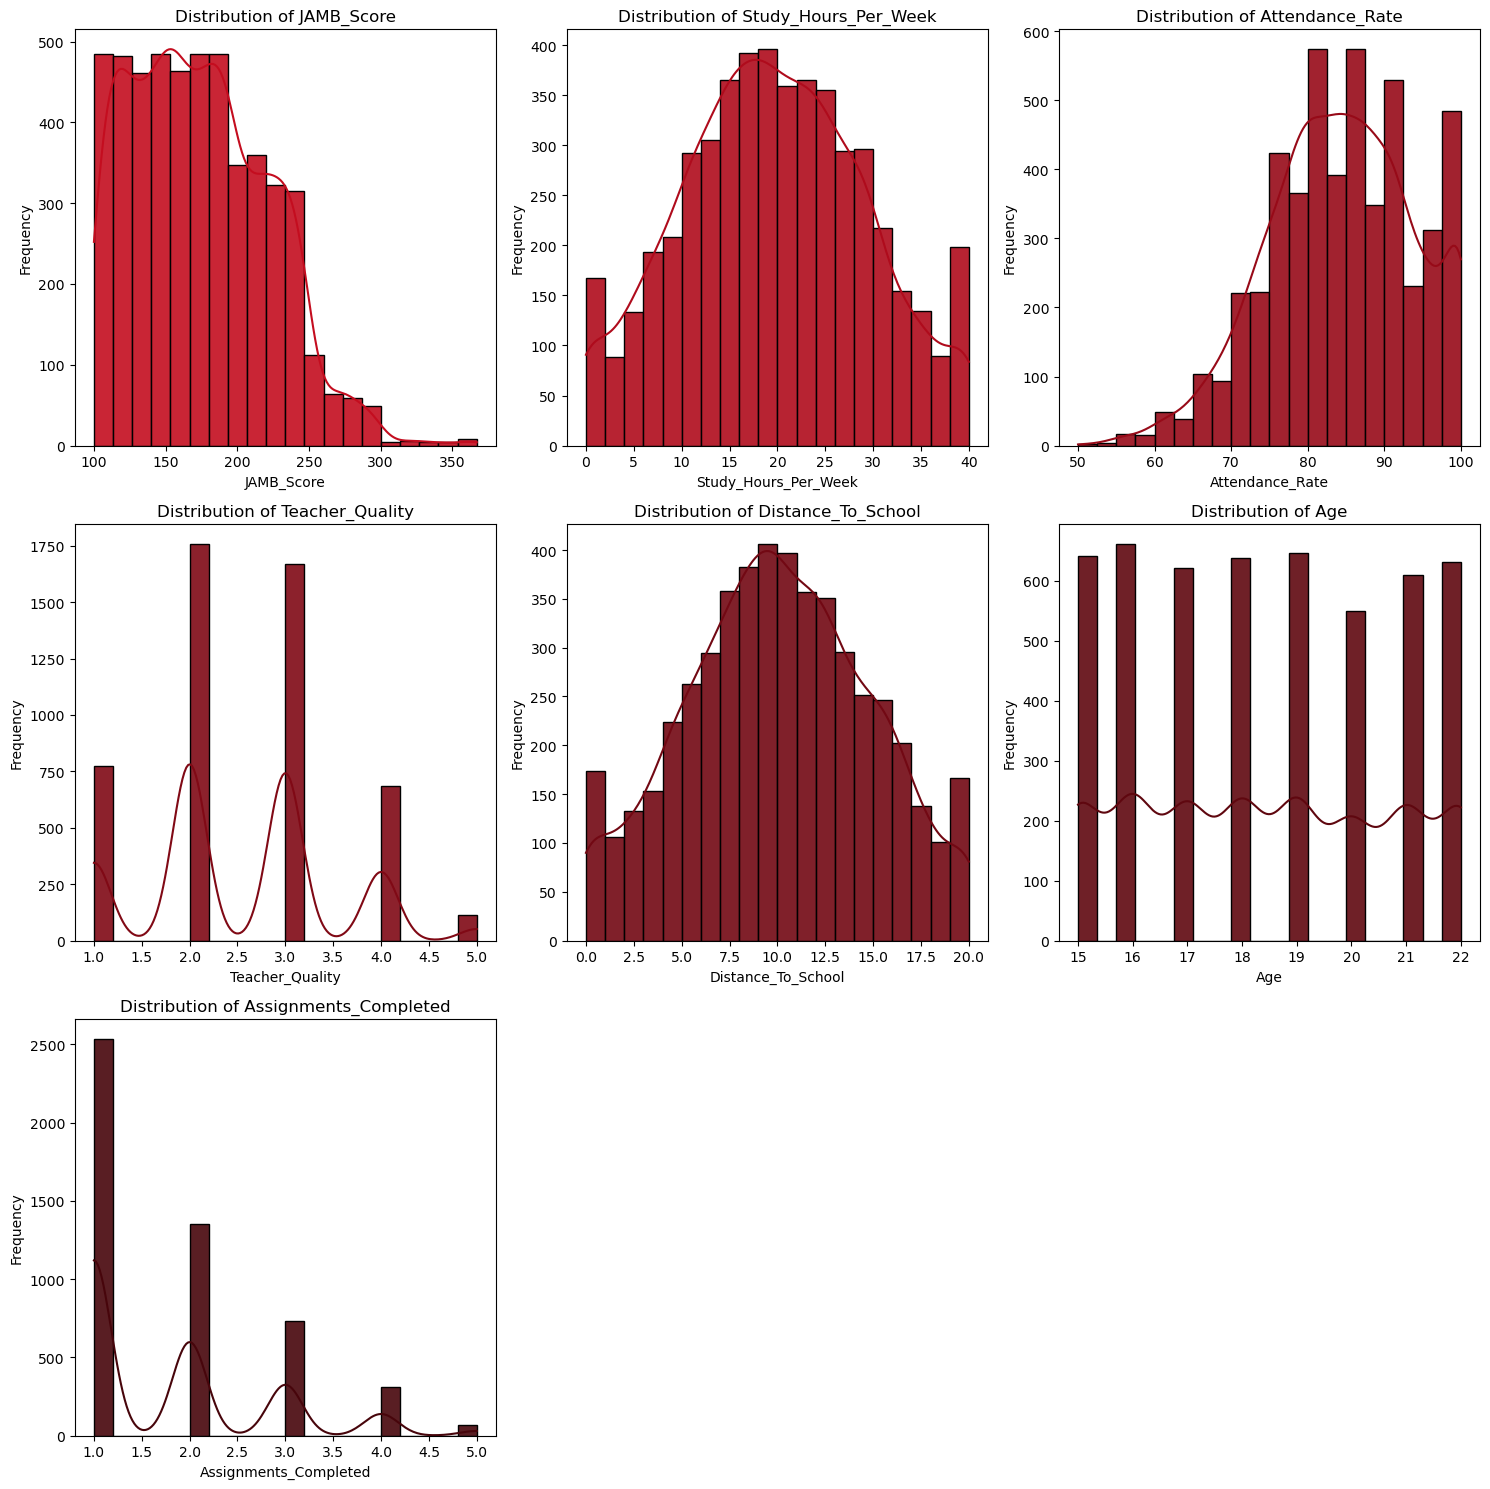

In [13]:
# Define the color palette with progressively darker shades
palette = sns.color_palette([
    "#C40D1F" ,
    "#AF0B1C" ,
    "#970A18" ,
    "#800915" ,
    "#720813" ,
    "#5F070F",
    "#47050B" ,
])
# List of numerical features to plot
numerical_features = [
    'JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate', 
    'Teacher_Quality', 'Distance_To_School', 'Age', 'Assignments_Completed'
]
# Number of features
num_features = len(numerical_features)
# Number of columns in the plot grid
num_cols = 3
# Number of rows needed
num_rows = (num_features + num_cols - 1) // num_cols

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), tight_layout=True)
axes = axes.flatten()

# Plot each feature
for i, (feature, color) in enumerate(zip(numerical_features, palette)):
    sns.histplot(df[feature], kde=True, bins=20, color=color, ax=axes[i], alpha=0.9)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

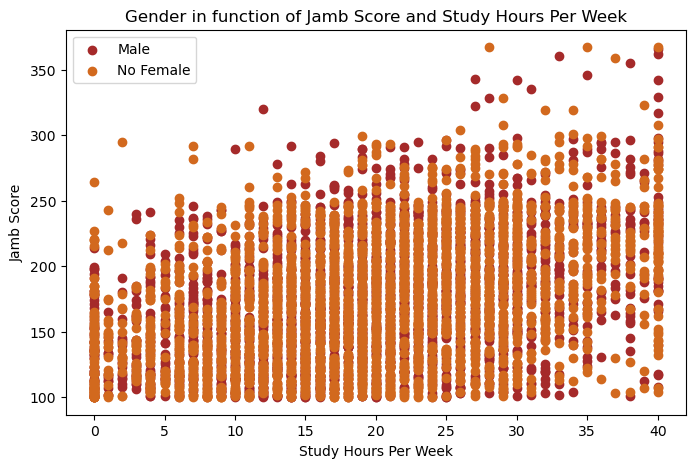

In [14]:
plt.figure(figsize=(8, 5))
#scatter with Male example
plt.scatter(df.Study_Hours_Per_Week[df.Gender=="Male"], 
           df.JAMB_Score[df.Gender=="Male"], 
           color = "brown")
# scatter with Female example
plt.scatter(df.Study_Hours_Per_Week[df.Gender=="Female"], 
           df.JAMB_Score[df.Gender=="Female"], 
           color = "chocolate")

# Add som usefull info 
plt.title("Gender in function of Jamb Score and Study Hours Per Week")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Jamb Score")
plt.legend(["Male", "No Female"]);

In [15]:
df.isna().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [16]:
# Fill missing value with pandas 
df.Parent_Education_Level.fillna("missing", inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_43116\518387223.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Parent_Education_Level.fillna("missing", inplace=True)


In [17]:
df.isna().sum()

JAMB_Score                      0
Study_Hours_Per_Week            0
Attendance_Rate                 0
Teacher_Quality                 0
Distance_To_School              0
School_Type                     0
School_Location                 0
Extra_Tutorials                 0
Access_To_Learning_Materials    0
Parent_Involvement              0
IT_Knowledge                    0
Student_ID                      0
Age                             0
Gender                          0
Socioeconomic_Status            0
Parent_Education_Level          0
Assignments_Completed           0
dtype: int64

In [18]:
df.dtypes

JAMB_Score                        int64
Study_Hours_Per_Week              int64
Attendance_Rate                   int64
Teacher_Quality                   int64
Distance_To_School              float64
School_Type                      object
School_Location                  object
Extra_Tutorials                  object
Access_To_Learning_Materials     object
Parent_Involvement               object
IT_Knowledge                     object
Student_ID                        int64
Age                               int64
Gender                           object
Socioeconomic_Status             object
Parent_Education_Level           object
Assignments_Completed             int64
dtype: object

In [19]:
X = df.drop("JAMB_Score", axis=1)
y = df.JAMB_Score

In [20]:
# split data into train and test set 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [21]:
# convert ccategorical features to numbers 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

categorical_features = ["School_Type", "School_Location", "Extra_Tutorials", "Access_To_Learning_Materials", 
                       "Parent_Involvement", "IT_Knowledge", "Gender", "Socioeconomic_Status", "Parent_Education_Level"] 
one_hot = OneHotEncoder() 
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                 categorical_features)], 
                               remainder="passthrough") 
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.fit_transform(X_test)

In [22]:
X_train_trans

array([[0.000e+00, 1.000e+00, 1.000e+00, ..., 2.562e+03, 1.800e+01,
        2.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.163e+03, 2.100e+01,
        3.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.744e+03, 1.600e+01,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.140e+02, 1.700e+01,
        1.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.110e+02, 1.800e+01,
        1.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 3.368e+03, 1.700e+01,
        1.000e+00]])

In [23]:
X_test_trans

array([[1.000e+00, 0.000e+00, 1.000e+00, ..., 4.752e+03, 1.800e+01,
        2.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 6.540e+02, 1.800e+01,
        1.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 4.444e+03, 1.800e+01,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.474e+03, 1.600e+01,
        1.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 3.763e+03, 1.500e+01,
        4.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.806e+03, 1.600e+01,
        1.000e+00]])

In [24]:
# Put model into dictionary 
np.random.seed(42)
models = {"RandomForest": RandomForestRegressor(),
         "LinearRegression": LinearRegression(), 
         "KNN": KNeighborsRegressor(),
         "GBR": GradientBoostingRegressor(), 
         "SVR": SVR()}

In [43]:
# Create a function to fit and score model 
def fit_and_score(models, X_train_trans, y_train, X_test_trans, y_test):
    # Create an empty dictionary
    model_scores = {}

    # create a random seed 
    np.random.seed(42) 

    # fit and evaluate the models 
    for model_name, model in models.items(): 
        model.fit(X_train_trans, y_train)
        y_pred = model.predict(X_test_trans)

        # Create an accuracy 
        r2 = model.score(X_test_trans, y_test)
        model_scores[model_name] = r2 
    
        print(f"Model: {model_name}")
        print(f"Cofficient of Determination: {r2:.2f}")
        print("Mean squared Error:")
        print(mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error:")
        print(root_mean_squared_error(y_test, y_pred))
        print("\n")

    return model_scores

model_scores = fit_and_score(models = models, 
                            X_train_trans = X_train_trans, 
                            y_train = y_train, 
                            X_test_trans = X_test_trans, 
                            y_test = y_test)

Model: RandomForest
Cofficient of Determination: -0.04
Mean squared Error:
2241.6195989
Root Mean Squared Error:
47.34574530937284


Model: LinearRegression
Cofficient of Determination: -0.00
Mean squared Error:
2172.7077559423733
Root Mean Squared Error:
46.61231335111328


Model: KNN
Cofficient of Determination: -0.17
Mean squared Error:
2538.8483600000004
Root Mean Squared Error:
50.38698601821705


Model: GBR
Cofficient of Determination: -0.01
Mean squared Error:
2196.2964277434367
Root Mean Squared Error:
46.86466075566361


Model: SVR
Cofficient of Determination: -0.00
Mean squared Error:
2166.305410811423
Root Mean Squared Error:
46.5435861404278




In [45]:
jamb = pd.read_csv("data/jamb_exam_results.csv")
jamb.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [46]:
jamb.Parent_Education_Level.fillna("missing", inplace=True)

In [47]:
jamb.dtypes

JAMB_Score                        int64
Study_Hours_Per_Week              int64
Attendance_Rate                   int64
Teacher_Quality                   int64
Distance_To_School              float64
School_Type                      object
School_Location                  object
Extra_Tutorials                  object
Access_To_Learning_Materials     object
Parent_Involvement               object
IT_Knowledge                     object
Student_ID                        int64
Age                               int64
Gender                           object
Socioeconomic_Status             object
Parent_Education_Level           object
Assignments_Completed             int64
dtype: object

In [48]:
jamb_dummies = pd.get_dummies(jamb[["JAMB_Score","Study_Hours_Per_Week", "Attendance_Rate", "Teacher_Quality", "Distance_To_School","School_Type", "School_Location", "Extra_Tutorials", "Access_To_Learning_Materials", 
                       "Parent_Involvement", "IT_Knowledge","Student_ID","Age", "Gender", "Socioeconomic_Status", "Parent_Education_Level","Assignments_Completed"]]) 

In [49]:
jamb_dummies.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed,School_Type_Private,School_Type_Public,...,IT_Knowledge_Medium,Gender_Female,Gender_Male,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Medium,Parent_Education_Level_Primary,Parent_Education_Level_Secondary,Parent_Education_Level_Tertiary,Parent_Education_Level_missing
0,192,22,78,4,12.4,1,17,2,False,True,...,True,False,True,False,True,False,False,False,True,False
1,207,14,88,4,2.7,2,15,1,False,True,...,False,False,True,True,False,False,False,False,False,True
2,182,29,87,2,9.6,3,20,2,False,True,...,True,True,False,True,False,False,False,False,True,False
3,210,29,99,2,2.6,4,22,1,False,True,...,False,True,False,False,False,True,False,False,True,False
4,199,12,98,3,8.8,5,22,1,False,True,...,True,True,False,False,False,True,False,False,True,False


In [50]:
# split data into X and y 
X = jamb_dummies.drop("JAMB_Score", axis=1)
y = jamb_dummies.JAMB_Score

In [51]:
# split into train and test set 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [52]:
# Put model into dictionary 
np.random.seed(42)
models = {"RandomForest": RandomForestRegressor(),
         "LinearRegression": LinearRegression(), 
         "KNN": KNeighborsRegressor(),
         "GBR": GradientBoostingRegressor(), 
         "SVR": SVR()}

In [53]:
# Create a function to fit and score model 
def fit_and_score(models, X_train, y_train, X_test, y_test):
    # Create an empty dictionary
    model_scores = {}

    # create a random seed 
    np.random.seed(42) 

    # fit and evaluate the models 
    for model_name, model in models.items(): 
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Create an accuracy 
        r2 = model.score(X_test, y_test)
        model_scores[model_name] = r2 
    
        print(f"Model: {model_name}")
        print(f"Cofficient of Determination: {r2:.2f}")
        print("Mean squared Error:")
        print(mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error:")
        print(root_mean_squared_error(y_test, y_pred))
        print("\n")

    return model_scores

model_scores = fit_and_score(models = models, 
                            X_train = X_train, 
                            y_train = y_train, 
                            X_test = X_test, 
                            y_test = y_test)

Model: RandomForest
Cofficient of Determination: 0.31
Mean squared Error:
1585.532121
Root Mean Squared Error:
39.818740826399825


Model: LinearRegression
Cofficient of Determination: 0.36
Mean squared Error:
1466.744392927836
Root Mean Squared Error:
38.29809907721056


Model: KNN
Cofficient of Determination: 0.06
Mean squared Error:
2170.53464
Root Mean Squared Error:
46.58899698426657


Model: GBR
Cofficient of Determination: 0.35
Mean squared Error:
1505.0113324768054
Root Mean Squared Error:
38.794475540684985


Model: SVR
Cofficient of Determination: -0.00
Mean squared Error:
2304.8312267869123
Root Mean Squared Error:
48.00865783155068




In [54]:
# Plotting function for the model comparison
def plot_model_comparison(model_scores):
    model_names = list(model_scores.keys())
    scores = list(model_scores.values())

    plt.figure(figsize=(8, 6))
    plt.bar(model_names, scores, color='brown')
    plt.xlabel("Model")
    plt.ylabel("Coefficient of Determination")
    plt.title("Model Comparison by Coefficient of Determination")
    plt.ylim(0, 1)  
    plt.show()

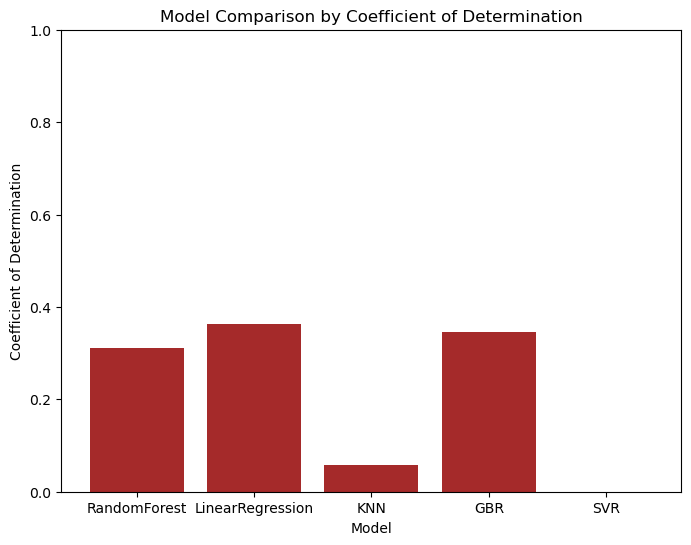

In [55]:
plot_model_comparison(model_scores)

### Hyperparameter turning using RandomizedSearchCV

In [56]:
# let see if we can improve the result of the Gradient Boost Regression 
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.7, 1.0]}

In [57]:
model = GradientBoostingRegressor()

random_gb = RandomizedSearchCV(model,
                     param_grid, 
                     cv=3,
                     n_jobs=-1, 
                    n_iter = 20)
random_gb.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.7, 1.0]})

In [58]:
random_gb.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 3,
 'learning_rate': 0.05}

In [59]:
random_gb.score(X_test, y_test)

0.3542665341568615

In [60]:
random_gb.predict(X_test)

array([184.74142425, 165.4033444 , 140.1229677 , 162.62076201,
       136.61158591, 147.388175  , 146.26457928, 148.71958458,
       145.41875807, 163.50948266, 185.72723336, 138.24340962,
       211.60142751, 133.40481878, 178.1689852 , 179.43305573,
       143.02646591, 154.3649278 , 154.15308863, 153.52501353,
       141.9410008 , 156.63947639, 149.4946763 , 171.72636641,
       175.4128728 , 193.44935645, 164.21419354, 177.48709439,
       183.54958839, 150.62582416, 221.58124513, 163.59083058,
       172.74843914, 191.02014203, 157.50361852, 146.10737712,
       215.79300327, 186.03372842, 221.52286916, 157.43233146,
       155.19959947, 186.53156597, 218.25139873, 188.97261323,
       224.33433716, 151.582293  , 126.48809755, 157.05313409,
       178.56919945, 146.81485873, 177.73701332, 198.78758272,
       137.59386353, 180.64044915, 157.98222569, 185.09312844,
       160.73635858, 196.86463366, 161.20566204, 163.88625918,
       154.64422417, 121.21753092, 134.9614751 , 159.25